In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Kerry\clean_jobs.csv')
print(data.shape)
data.head()

(327, 10)


,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [2]:
data.isnull().sum()

id                   0
title                0
company              0
location             0
link                 0
source               0
date_posted          0
work_type          327
employment_type    327
description          0
dtype: int64

In [3]:
data.duplicated().sum()

0

In [4]:
data = data.drop(columns=['work_type', 'employment_type'])

In [5]:
data.columns

Index(['id', 'title', 'company', 'location', 'link', 'source', 'date_posted',
       'description'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           327 non-null    int64 
 1   title        327 non-null    object
 2   company      327 non-null    object
 3   location     327 non-null    object
 4   link         327 non-null    object
 5   source       327 non-null    object
 6   date_posted  327 non-null    object
 7   description  327 non-null    object
dtypes: int64(1), object(7)
memory usage: 20.6+ KB


In [7]:
data.describe()

,id
count,327.000000
mean,382.605505
std,224.546087
min,1.000000
25%,132.500000
50%,425.000000
75%,599.500000
max,741.000000


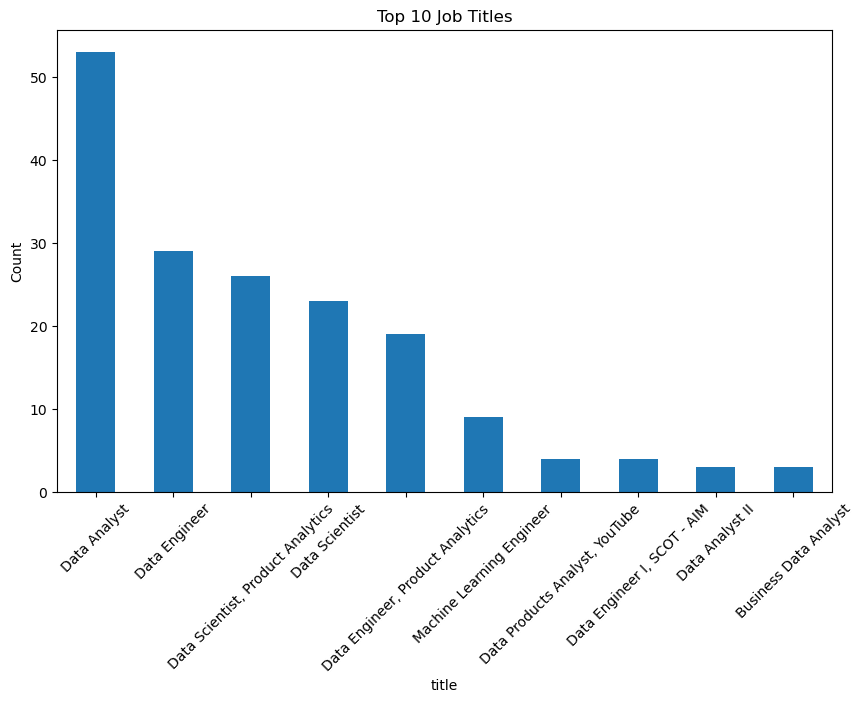

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
data['title'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Job Titles")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [14]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts().head(5))


Column: title
title
Data Analyst                         53
Data Engineer                        29
Data Scientist, Product Analytics    26
Data Scientist                       23
Data Engineer, Product Analytics     19
Name: count, dtype: int64

Column: company
company
Meta         57
Google       12
Netflix      11
Amazon       10
Pinterest     5
Name: count, dtype: int64

Column: location
location
New York, NY                   31
United States                  26
Bengaluru, Karnataka, India    25
San Francisco, CA              19
Sunnyvale, CA                  10
Name: count, dtype: int64

Column: link
link
https://www.linkedin.com/jobs/view/data-analyst-at-meta-4186238974                                1
https://www.linkedin.com/jobs/view/data-scientist-product-analytics-at-meta-4187594995            1
https://www.linkedin.com/jobs/view/data-engineer-l4-security-at-netflix-4148718851                1
https://www.linkedin.com/jobs/view/data-engineer-l5-conversation-at-netflix-4188

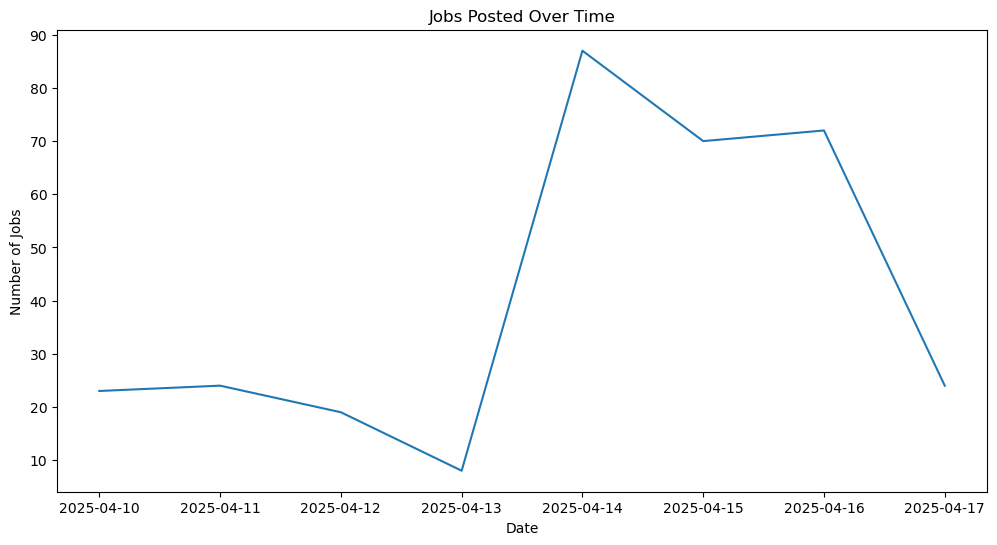

In [10]:
daily_jobs = data.groupby('date_posted').size()

daily_jobs.plot(figsize=(12,6), title='Jobs Posted Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.show()